In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import pandas_datareader as web
import math
import yfinance as yf
import pandas as pd
import seaborn as sns

In [2]:
etf = ['BZ=F','EURUSD=X','TTF=F'] #,'TTFX23.NYM','TTFZ23.NYM','TTFV23.NYM']
#data = yf.Ticker(etf)
#dataH = data.history(start='2007-01-01',period='1d')
it = yf.download(tickers=etf, period='1d',start='2012-01-01')
it = it.rename(columns = {'EURUSD=X':'€/$','TTF=F':'Gaz','BZ=F':'Brent'})

[*********************100%***********************]  3 of 3 completed


In [11]:
def filtreAnnee(df, a):
    mask_ = (df['Date'] == a)
    #mask_ = ((fin['mois'] == 2) & (fin['year'] == 2022))
    return df.loc[mask_]

          Brent       €/$       Gaz
Brent  1.000000 -0.107857  0.366801
€/$   -0.107857  1.000000 -0.810317
Gaz    0.366801 -0.810317  1.000000


<AxesSubplot:>

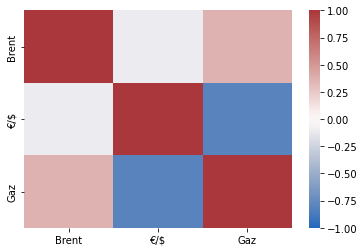

In [3]:
data = it['Close']
##print(data.loc['20200101':'20201231'])
##final.set_index('Date')
final = data.loc['20180101':'20181231']
corr = final.corr()
print(corr)
sns.heatmap(corr,cmap='vlag', vmin=-1, vmax=1)

<AxesSubplot:xlabel='Date', ylabel='€/$'>

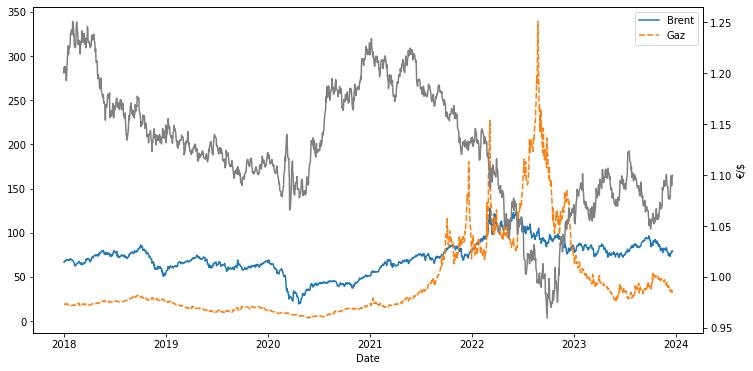

In [37]:
# on Affiche le graphique
final = data['20180101':'20231231']
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=final[['Brent','Gaz']], color='Blue')
ax2 = plt.twinx()
sns.lineplot(data=final['€/$'], ax=ax2 , color='grey')

In [8]:
def getCorr(an):
    _from = an+'0101'
    _to = an+'1231'
    d = data[_from:_to]
    v = d.corr()[2:3]
    return v

In [33]:
def getCorrDelta(begin, end):
    _from = begin+'0101'
    _to = end+'1231'
    d = data[_from:_to]
    return d.corr()

In [16]:
print(getCorr('2018')['Brent'][0])
print(getCorr('2019')['Brent'][0])
print(getCorr('2020')['Brent'][0])
print(getCorr('2021')['Brent'][0])
print(getCorr('2022')['Brent'][0])
print(getCorr('2023')['Brent'][0])

0.3668006694078412
-0.13590301504000565
0.4192988067232292
0.6849612024194414
-0.053969065674338866
0.27695941268787927


In [35]:
print(getCorrDelta('2022','2023')['Brent']['Gaz'])

0.5090996815771182
